# Ejercicio resuelto en clase: Atari ASSAULT

In [1]:
!pip install "gymnasium[atari]"
!pip install gymnasium[accept-rom-license]
# !pip install --upgrade ipykernel

# Imports

In [3]:
import gymnasium as gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [4]:
obs_type = "grayscale"
# obs_type = "rgb"
env = gym.make("ALE/Assault-v5", obs_type=obs_type)
num_actions = env.action_space.n
# input_shape = list(env.observation_space.shape)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


{'lives': 4, 'episode_frame_number': 0, 'frame_number': 0} (210, 160) (210, 160, 1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
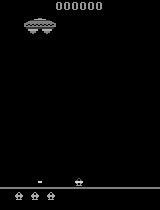

In [5]:

s0, info = env.reset()

if obs_type == "grayscale":
  input_shape = (*s0.shape, 1)
else:
  raise NotImplementedError("TODO implement a grease conversion to reduce the RGP dim")
print(info, s0.shape, input_shape)
s0

array([[[102, 217,  53],
        [243, 190, 123],
        [165, 188,   6],
        ...,
        [ 45, 162, 107],
        [203, 249, 101],
        [176,  23, 237]],

       [[227,  59, 108],
        [158,  80, 126],
        [ 34, 234, 149],
        ...,
        [155, 221,   7],
        [ 45, 114,  25],
        [ 61, 247, 163]],

       [[150, 245,  30],
        [ 24,  21, 156],
        [236,  34,  88],
        ...,
        [ 57,  67, 179],
        [ 15,  81,   6],
        [129, 228,  77]],

       ...,

       [[171,   9, 218],
        [ 93,  77,  47],
        [251, 104, 168],
        ...,
        [117,  41,  46],
        [224, 173,  43],
        [246, 205,  81]],

       [[ 84,  51, 137],
        [128,  74,   4],
        [ 10,  95,  48],
        ...,
        [ 28, 132,  84],
        [250,  35,  58],
        [ 44,  43,  54]],

       [[162, 195,  25],
        [ 23,  96, 218],
        [ 56, 169, 100],
        ...,
        [200,  83, 117],
        [113, 166, 115],
        [249,  26,  14]]], dtype=uint8)
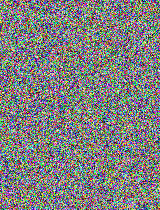

In [6]:
random_image = np.random.randint(255, size=(210, 160, 3), dtype="uint8")
random_image

## Check full random episode

1 0.0 {'lives': 4, 'episode_frame_number': 4, 'frame_number': 4}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
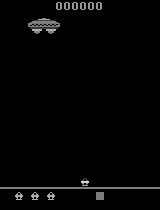

2 0.0 {'lives': 4, 'episode_frame_number': 8, 'frame_number': 8}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
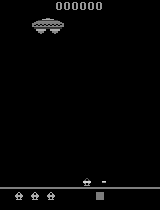

3 0.0 {'lives': 4, 'episode_frame_number': 12, 'frame_number': 12}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
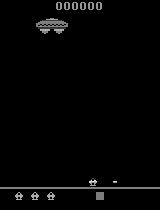

4 0.0 {'lives': 4, 'episode_frame_number': 16, 'frame_number': 16}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
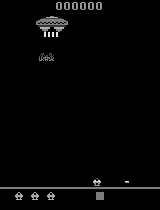

5 0.0 {'lives': 4, 'episode_frame_number': 20, 'frame_number': 20}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
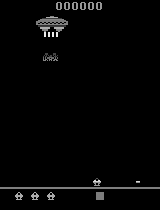

6 0.0 {'lives': 4, 'episode_frame_number': 24, 'frame_number': 24}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
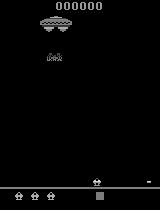

In [7]:
s0 = env.reset()
experiences = []
r_sum = 0
count = 0
while True:
  a = env.action_space.sample()
  s1, r, d, t, info = env.step(a)
  experiences.append([s0, a, s1, r, d, t, info])
  r_sum += r
  s0 = s1
  count += 1
  if d or t:
    break

  if count % 100 == 0 or True:
    print(count, r_sum, info)
    display(s0)

  if count > 5:
    break

array([[[163, 163, 163],
        [198, 198, 198],
        [160, 160, 160],
        ...,
        [120, 120, 120],
        [218, 218, 218],
        [ 93,  93,  93]],

       [[114, 114, 114],
        [108, 108, 108],
        [164, 164, 164],
        ...,
        [176, 176, 176],
        [ 83,  83,  83],
        [181, 181, 181]],

       [[192, 192, 192],
        [ 37,  37,  37],
        [100, 100, 100],
        ...,
        [ 76,  76,  76],
        [ 52,  52,  52],
        [181, 181, 181]],

       ...,

       [[ 81,  81,  81],
        [ 78,  78,  78],
        [155, 155, 155],
        ...,
        [ 64,  64,  64],
        [173, 173, 173],
        [203, 203, 203]],

       [[ 70,  70,  70],
        [ 82,  82,  82],
        [ 64,  64,  64],
        ...,
        [ 95,  95,  95],
        [101, 101, 101],
        [ 44,  44,  44]],

       [[165, 165, 165],
        [ 88,  88,  88],
        [127, 127, 127],
        ...,
        [121, 121, 121],
        [144, 144, 144],
        [ 91,  91,  91]]], dtype=uint8)
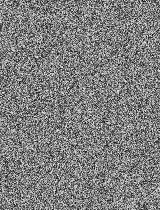

In [8]:
test = random_image

R, G, B = test[:, :, 0], test[:, :, 1], test[:, :, 2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
test[:,:, 0] = imgGray
test[:,:, 1] = imgGray
test[:,:, 2] = imgGray
test

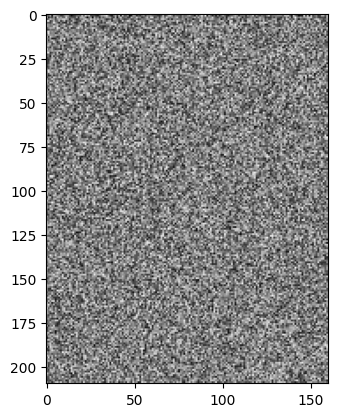

In [9]:
plt.imshow(test, cmap="gray")
plt.show()

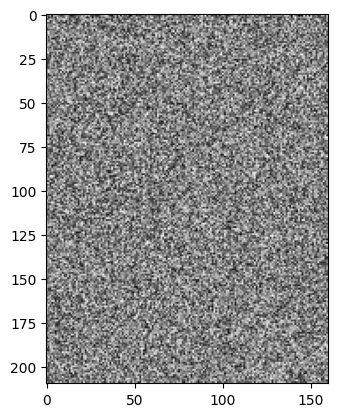

In [10]:
plt.imshow(imgGray, cmap="gray")
plt.show()

In [11]:
def create_q_model():
    # Network defined by the Deepmind paper
    inputs = layers.Input(shape=input_shape)

    # Convolutions on the frames on the screen
    layer1 = layers.Conv2D(32, 8, strides=4, activation="relu")(inputs)
    layer2 = layers.Conv2D(64, 4, strides=2, activation="relu")(layer1)
    layer3 = layers.Conv2D(64, 3, strides=1, activation="relu")(layer2)

    layer4 = layers.Flatten()(layer3)

    layer5 = layers.Dense(512, activation="relu")(layer4) # many neurons!
    action = layers.Dense(num_actions, activation="linear")(layer5)

    return Model(inputs=inputs, outputs=action)

In [12]:
q_model = create_q_model()

q_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 210, 160, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 51, 39, 32)        2080      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 18, 64)        32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 16, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 22528)             0         
                                                                 
 dense (Dense)               (None, 512)               11534848  
                                                                 
 dense_1 (Dense)             (None, 7)                 3591  

In [16]:
s0_b = np.expand_dims(s0, axis=0)
q0_b = q_model(s0_b)
q0_b, q0_b.shape

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.2856973 , -1.0072536 ,  1.7100867 ,  0.7937597 , -0.36047602,
         -1.3509526 ,  0.64996743]], dtype=float32)>,
 TensorShape([1, 7]))

In [17]:
np.argmax(q0_b)

2

In [106]:
decay = 0.9999
epsilon_ini = 1.0
epsilon_end = 0.05
gamma = 0.999

(210, 160, 1)